# Perceptron 

- This tutorial incarnates perceptron as an object-oriented API and learns how to train the perceptron object using the Iris flowers dataset.

### Import libraries

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Represent Perceptron as an object-oriented API

In [7]:
class Perceptron(object):
    def __init__(self, lr=0.01, epochs=50, random_state=1):
        # parameters:
        # lr: float; learning rate
        # epochs: int; number of iterations
        # random_state: int; random generator seed
        
        # self.w_: 1-d array; learned weights
        # self.errors_: list; classification errors accumulated from each epoch
        
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
        
    def fit(self, X, y):
        # parameters:
        # X: {array-like}, shape = [n_samples, n_features]; training data
        # y: array-like, shape = [n_samples]; target (label) data
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) # using unit step function

### Load Iris flowers dataset

In [3]:
df = pd.read_csv('./Iris.csv', header=None, encoding='utf-8', index_col=0)[1:]
df.head()

,1,2,3,4,5
0,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# get Iris-setosa and Iris-versicolor data (50 values each)
y = df.iloc[0:100, 4].to_numpy()
y = np.where(y == 'Iris-setosa', -1, 1)

# get 'sepal length' and 'petal length' features from samples
X = df.iloc[0:100, [0, 2]].to_numpy(dtype='float32')

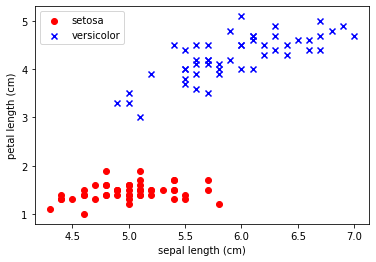

In [5]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

### Train perceptron algorithm using the data

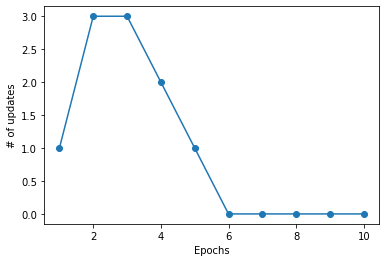

In [8]:
ppn = Perceptron(lr=0.1, epochs=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('# of updates')
plt.show()

### Display a decision boundary of 2-D dataset

In [16]:
def display_decision_boundary(X, y, classifier, step=0.02):
    markers = ('o', 'x', 's', '^', 'v')
    colors = ['red', 'blue', 'green', 'yellow', 'gray']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # display a decision boundary
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    # cdts is a short-form of coordinates
    # np.meshgrid returns coordinate matrices from coordinate vectors
    x1_cdts, x2_cdts = np.meshgrid(np.arange(x1_min-1, x1_max+1, step), np.arange(x2_min-1, x2_max+1, step))
    Z = classifier.predict(np.array([x1_cdts.ravel(), x2_cdts.ravel()]).T) # transpose an array using .T
    Z = Z.reshape(x1_cdts.shape)
    plt.contourf(x1_cdts, x2_cdts, Z, alpha=0.3, cmap=cmap)
    plt.xlim(x1_cdts.min(), x1_cdts.max())
    plt.ylim(x2_cdts.min(), x2_cdts.max())

    labels = {-1:'setosa', 1:'versicolor'}
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1], # use of boolean masks
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=labels[cl],
        )

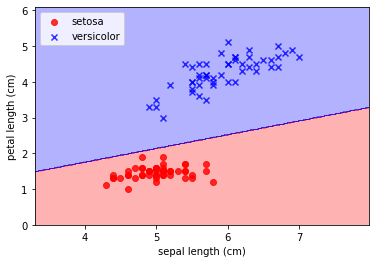

In [17]:
display_decision_boundary(X, y, ppn)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()